<a href="https://colab.research.google.com/github/viczzzz/Capstone-Fashion-Trend-Forecasting/blob/main/Capstone_Week9_Trained_VGG16t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing  required libraries
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
sns.set_style("whitegrid")

In [2]:
from keras.utils.np_utils import to_categorical

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.getcwd()
os.chdir('/content/drive/MyDrive/zalando')

In [5]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [6]:
print('Train: ', fashion_train_df.shape)
print('Test: ', fashion_test_df.shape)

Train:  (60000, 785)
Test:  (10000, 785)


In [7]:
train = np.array(fashion_train_df, dtype = 'float32')
test = np.array(fashion_test_df, dtype='float32')

In [8]:
fashion_train_df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [9]:
#checking if there are any null values
fashion_train_df.isnull().any().sum()
fashion_test_df.isnull().any().sum()


0

In [10]:
class_names = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

In [11]:
#i = random.randint(1,60000)
# The values are mapped to colors using normalization and a colormap
#plt.imshow(train[i,1:].reshape((28,28))) 
#plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray') 
#label_index = fashion_train_df["label"][i]
#plt.title(f"{class_names[label_index]}")
#plt.axis()

In [12]:
#Label of the random image
#label = train[i,0]
#label

In [13]:
fashion_train_df['label'].value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


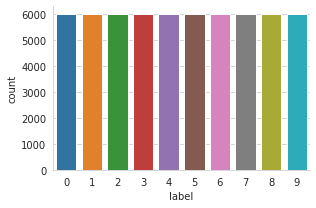

In [14]:
#All classes are equally Distributed.So, there is no need for OverSampling or UnderSampling.
sns.factorplot(x='label', data=fashion_train_df, kind='count', size=3, aspect= 1.5)

In [15]:
# Setting Random Seeds for Reproducibilty.
seed = 66
np.random.seed(seed)

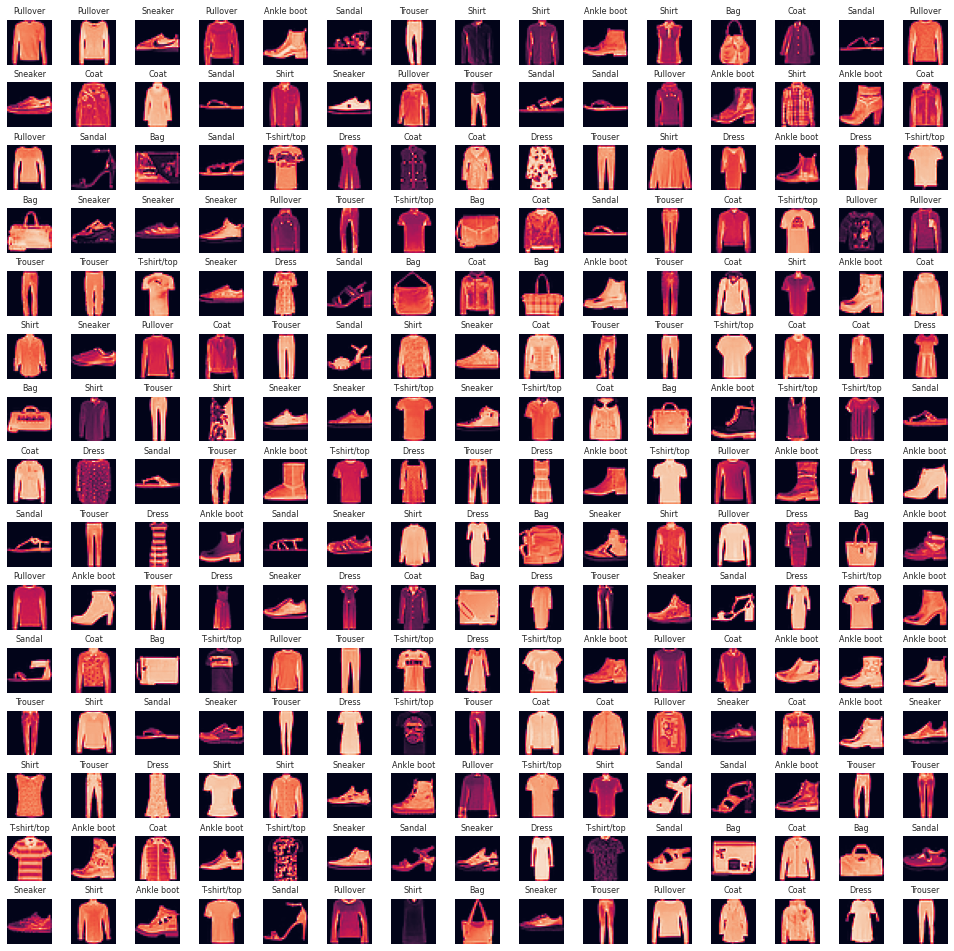

In [16]:
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [17]:
# Prepare the training and testing dataset 
X = train[:, 1:]
Y = train[:, 0]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)

In [18]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

fashion_test_df.drop('label', axis=1, inplace=True)
df_test = fashion_test_df.values.reshape((-1, 28, 28, 1))

In [19]:
# You need to make sure that your Image is cast into double/float from int before you do this scaling 
# as you will most likely generate floating point numbers.
# And had it been int, the values will be truncated to zero.

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
fashion_test_df = fashion_test_df.astype("float32")/255

In [20]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [21]:
print(y_train.shape)
print(y_test.shape)

(54000, 10)
(6000, 10)


**Building a ConvNet**

1) At First, we use Sequential Keras API which is just a linear stack of layers. We add one layer at a time starting from input.

2) Next We add Convolutional Layers, which are the Building blocks of ConvNets. Convolutional Layers has set of Independent Filters whose depth is equal to Input and other dimensions can be set manually. These Filters when convolved over the Input Image produce Feature Maps.

It includes some HyperParameters such as The number of filters, Dimensions of Filter (F), Stride (S), Padding(P) , Activation Function etc. which we input manually. Let the Input Volume Size be deonted by (W) ,

Then, the Output will have Dimensions given by -->

(Height, Width) = ( ( W − F + 2P ) / S ) + 1

And the Depth will be equal to Number of Filters Specified.

3) Next We add Pooling Layers, which are used for Dimensionality Reduction or DownSampling the Input. These are used where we have lot of Input Features. It reduces the amount of Parameters and Computational power required drastically, thus reducing Overfitting. These along with Convolutional layers are able to learn more Complex features of the Image.

4) We add Batch Normalization where we acheive Zero mean and Variance one. It scales down outliers and forces the network to learn features in a distributed way, not relying too much on a Particular Weight and makes the model better Generalize the Images.

5) To avoid Overfitting We add Dropout. This randomly drops some percentage of neurons, and thus the weights gets Re-Aligned. The remaining Neurons learn more features and this reduces the dependency on any one Neuron. DropOut is a Regularization Technique, which Penalizes the Parameters. Generally we set the DropOutRate between 0.2-0.5 .

6) Finally we add Flatten layer to map the input to a 1D vector. We then add Fully connected Layers after some convolutional/pooling layers. It combines all the Features of the Previous Layers.

7) Lastly, we add the Output Layer. It has units equal to the number of classes to be identified. Here, we use 'sigmoid' function if it is Binary Classification otherwise 'softmax' activation function in case of Multi-Class Classification.

In [22]:
# Building a ConvNet
#from keras import models
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout



model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
    
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

***4.2) Compiling the Model¶***

1) We need to compile the model. We have to specify the optimizer used by the model We have many choices like Adam, RMSprop etc.. Refer to Keras doc for a comprehensive list of the optimizers available.

2) Next we need to specify the loss function for the neural network which we want to minimize.

For Binary Classification we use "binary_crossentropy" and for Multi-class Classification we use "categorical_crossentropy".

3) Finally, We need to specify the metric to evaluate our models performance. Here I have used accuracy.

In [20]:


In [23]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [25]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        1

4.4) Learning Rate Decay


The Learning rate should be properly tuned , such that it is not too high to take very large steps, neither it should be too small , which would not alter the Weights and Biases.
We will use LearningRateScheduler here, which takes the step decay function as argument and return the updated learning rates for use in optimzer at every epoch stage. Basically it outputs a new learning rate at every epoch stage.

In [26]:
from keras.callbacks import LearningRateScheduler
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

4.5) Data Augmentation


In [27]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

In [28]:
datagen.fit(x_train)


4.6) Fitting the Model


In [29]:
batch_size = 128
epochs = 40

In [30]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = 2, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/2
421/421 - 586s - loss: 0.8549 - accuracy: 0.6961 - val_loss: 2.0626 - val_accuracy: 0.3533 - lr: 0.0010 - 586s/epoch - 1s/step
Epoch 2/2
421/421 - 560s - loss: 0.5494 - accuracy: 0.8002 - val_loss: 0.4356 - val_accuracy: 0.8392 - lr: 9.0000e-04 - 560s/epoch - 1s/step


5) Evaluating the Model¶

In [31]:
score = model.evaluate(x_test, y_test)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

188/188 [==============================] - 15s 79ms/step - loss: 0.4356 - accuracy: 0.8392
Loss: 0.4356
Accuracy: 0.8392


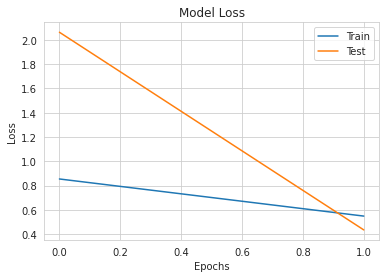

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

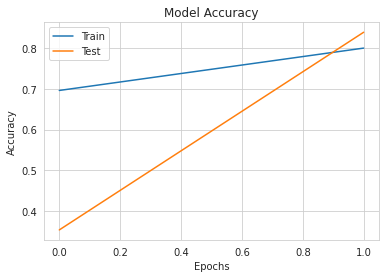

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

The Training and Validation Curves being close, we can conclude that the Model is not Overfitting the Data.


In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

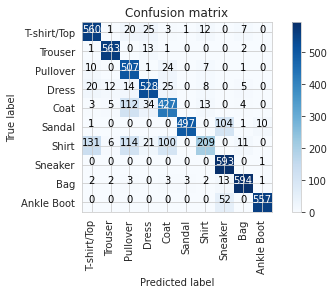

In [35]:
from sklearn.metrics import confusion_matrix
import itertools    


# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

We can see that a large number of T-shirt are misclassified as Shirt.
Followed by, Shirts wrongly classified as Coat.


# **7) Visualization of Predicted Classes**
7.1) Correctly Predicted Classes



In [36]:
correct = []
for i in range(len(y_test)):
    if(Y_pred_classes[i] == Y_true[i]):
        correct.append(i)
    if(len(correct) == 4):
        break

In [37]:
incorrect = []
for i in range(len(y_test)):
    if(not Y_pred_classes[i] == Y_true[i]):
        incorrect.append(i)
    if(len(incorrect) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : Sneaker\nActual Label : Sneaker\nPossibly Misclassified Lable : Pullover')

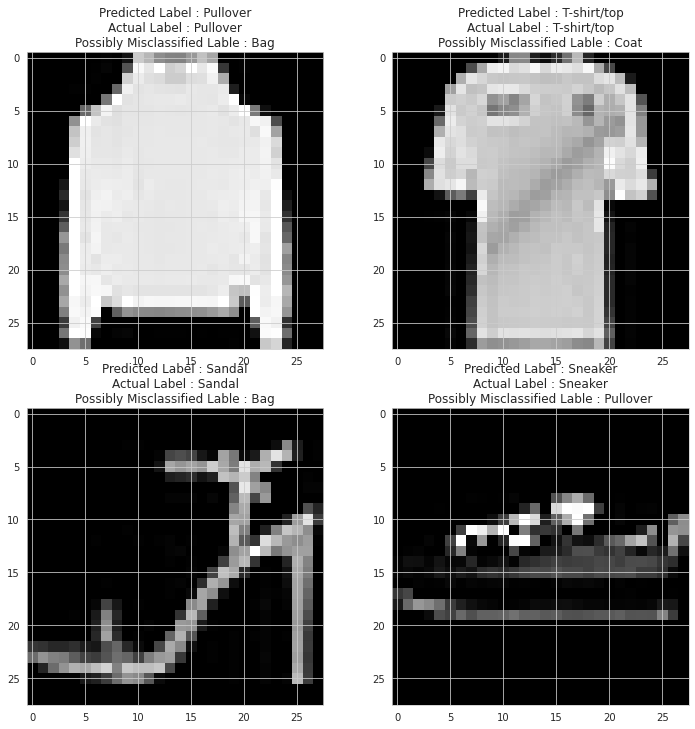

In [38]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(12,12)
ax[0,0].imshow(x_test[correct[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(class_names[Y_pred_classes[correct[0]]]) + "\n" + "Actual Label : " + 
                 str(class_names[Y_true[correct[0]]]) + "\n" + "Possibly Misclassified Lable : " + str(class_names[Y_pred_classes[incorrect[0]]]))
ax[0,1].imshow(x_test[correct[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(class_names[Y_pred_classes[correct[1]]])  + "\n"+"Actual Label : " + 
                 str(class_names[Y_true[correct[1]]]) + "\n" + "Possibly Misclassified Lable : " + str(class_names[Y_pred_classes[incorrect[1]]]))
ax[1,0].imshow(x_test[correct[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(class_names[Y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " + 
                 str(class_names[Y_true[correct[2]]]) + "\n" + "Possibly Misclassified Lable : " + str(class_names[Y_pred_classes[incorrect[2]]]))
ax[1,1].imshow(x_test[correct[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(class_names[Y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " + 
                 str(class_names[Y_true[correct[3]]]) + "\n" + "Possibly Misclassified Lable : " + str(class_names[Y_pred_classes[incorrect[3]]]))


# **8) Classification Report**

The classification report visualizer displays **the precision, recall, F1, and support scores** for the model.

***Precision*** is the ability of a classiifer not to label an instance positive that is actually negative. Basically, it is defined as as the ratio of true positives to the sum of true and false positives. “For all instances classified positive, what percent was correct?”

***Recall*** is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. “For all instances that were actually positive, what percent was classified correctly?”

***The F1 score*** is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0 . Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation.

***Support*** is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.

In [39]:
from sklearn.metrics import classification_report

classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.77      0.89      0.83       629
     Trouser       0.96      0.97      0.96       580
    Pullover       0.66      0.92      0.77       550
       Dress       0.85      0.86      0.86       612
        Coat       0.73      0.71      0.72       598
      Sandal       0.99      0.81      0.89       613
       Shirt       0.83      0.35      0.50       592
     Sneaker       0.78      1.00      0.87       594
         Bag       0.95      0.95      0.95       623
  Ankle Boot       0.98      0.91      0.95       609

    accuracy                           0.84      6000
   macro avg       0.85      0.84      0.83      6000
weighted avg       0.85      0.84      0.83      6000



Look at the Precision of the Shirts, we can see that our model predicted less than 80% of Shirts correctly out of the total images it predicted as Shirts. We did conclude the same from the confusion matrix, where we saw that a lot of T-shirts were misclassified as Shirts.

# **9) Predicting on the Test Data**



In [40]:
import pandas as pd
X = df_test
test = pd.DataFrame(test)
Y = to_categorical(test.iloc[:,0])

In [ ]:
score = model.evaluate(X, Y)
print("Loss: {:.4f}".format(score[0]))
print("Accuracy: {:.4f}".format(score[1]))

313/313 [==============================] - 31s 99ms/step - loss: 58021.6523 - accuracy: 0.2961
Loss: 58021.6523
Accuracy: 0.2961


In [49]:
import keras
import tensorflow
from keras import utils


In [51]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16;
from keras.applications.vgg16 import preprocess_input
import os

In [52]:
train_data = pd.read_csv('fashion-mnist_train.csv',sep=',')
test_data = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [53]:
train_data.shape
test_data.shape 
train_X= np.array(train_data.iloc[:,1:])
test_X= np.array(test_data.iloc[:,1:])
train_Y= np.array (train_data.iloc[:,0])
test_Y = np.array(test_data.iloc[:,0])

The images of fashionMNIST are black and white, while the required input for VGG19 must be colored images. Thus, I convert the images into colored ones with 3 channels R, G, B.

In [57]:
train_X=np.dstack([train_X] * 3)
test_X=np.dstack([test_X]*3)
train_X.shape,test_X.shape


((60000, 784, 3), (10000, 784, 3))

In [58]:
# Reshape images as per the tensor format required by tensorflow
train_X = train_X.reshape(-1, 28,28,3)
test_X= test_X.reshape (-1,28,28,3)
train_X.shape,test_X.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [59]:
train_X = train_X / 255.
test_X = test_X / 255.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [60]:
from keras.preprocessing.image import img_to_array, array_to_img
train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_X])
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_X])
#train_x = preprocess_input(x)
train_X.shape, test_X.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [61]:
# Normalise the data and change data type
train_X = train_X / 255.
test_X = test_X / 255.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [62]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [63]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X,
                                                           train_Y_one_hot,
                                                           test_size=0.2,
                                                           random_state=13
                                                           )



## **BUILDING VGG 19**


In [ ]:
!pip install keras_applications

     |████████████████████████████████| 50 kB 4.8 MB/s 


In [ ]:
tf.keras.applications.vgg19.VGG19(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)

574726144/574710816 [==============================] - 13s 0us/step


In [ ]:
tf.keras.applications.VGG19
tf.keras.applications.vgg19.VGG19

<function keras.applications.vgg19.VGG19>

In [ ]:
import keras
import tensorflow as tf
from keras.models import Model
#from keras.applications import VGG19,VGG16,InceptionV3,MobileNetV2,ResNet50,Xception,DenseNet201,NASNetMobile

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.layers import Dense, Dropout
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers



In [ ]:
# Create the base model of VGG19
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (150, 150, 3), classes = 10)


80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12345)

print(X_train.shape)
print(y_train.shape)

(43200, 28, 28, 1)
(43200, 10)


In [ ]:
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

IndexError: ignored

In [ ]:
# Create the base model of VGG19
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (150, 150, 3), classes = 10)

# Preprocessing the input 
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

# Extracting features
train_features = vgg19.predict(np.array(X_train), batch_size=256, verbose=1)
test_features = vgg19.predict(np.array(X_test), batch_size=256, verbose=1)
val_features = vgg19.predict(np.array(X_val), batch_size=256, verbose=1)

# Flatten extracted features
train_features = np.reshape(train_features, (48000, 4*4*512))
test_features = np.reshape(test_features, (10000, 4*4*512))
val_features = np.reshape(val_features, (12000, 4*4*512))

# Add Dense and Dropout layers on top of VGG19 pre-trained
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

***ANOTHER WAY TO BUILD CNN & TRAIN THE MODEL***

In [ ]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

print(X_train.shape)
print(y_train.shape)

In [ ]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

In [ ]:
X_train.shape
Input_shape = X_train.shape[1:]
Input_shape

In [ ]:
##To define and train the convolutional neural network, we will import the required libraries here.
#Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

cnn_model.summary()

In [ ]:
#Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [ ]:
#Training the CNN model
#history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 5, verbose = 1, validation_data = (X_validate, y_validate))
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 5, verbose = 1, validation_data = (X_validate, y_validate))


Text(0.5, 1.0, 'Accuracy evolution')

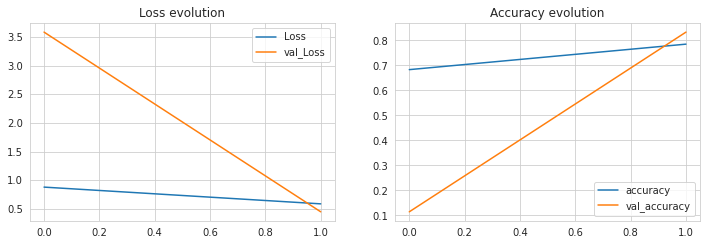

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

In [ ]:
#Predictions for the test data
predicted_classes = cnn_model.predict(X_test)
predicted_classes = np.round(predicted_classes).astype(int)
test_img = X_test
prediction = cnn_model.predict(test_img)
prediction[0]
np.argmax(prediction[0])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics



y_test = np.argmax(y_test,axis=None)
predicted_classes = np.argmax(cnn_model.predict(X_test),axis=1)
#print('Confusion Matrix')
#print(confusion_matrix(y_test_arg, predicted_classes))

cm = metrics.confusion_matrix(y_test, predicted_classes)

NameError: ignored

In [ ]:
import keras
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.layers import Dense, Dropout
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers

# Create the base model of VGG19
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (150, 150, 3), classes = 10)

# Preprocessing the input 
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

# Extracting features
train_features = vgg19.predict(np.array(X_train), batch_size=256, verbose=1)
test_features = vgg19.predict(np.array(X_test), batch_size=256, verbose=1)
val_features = vgg19.predict(np.array(X_val), batch_size=256, verbose=1)

# Flatten extracted features
train_features = np.reshape(train_features, (48000, 4*4*512))
test_features = np.reshape(test_features, (10000, 4*4*512))
val_features = np.reshape(val_features, (12000, 4*4*512))

# Add Dense and Dropout layers on top of VGG19 pre-trained
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#import keras
#import tensorflow as tf
#from keras.applications import VGG19
#from keras.applications.vgg19 import preprocess_input
#from keras.layers import Dense, Dropout
#from keras.models import Model
#from keras import models
#from keras import layers
#from keras import optimizers

In [ ]:
tf.keras.applications.vgg19.VGG19(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)

In [ ]:
!pip install keras_applications

In [ ]:
tf.keras.applications.VGG19
tf.keras.applications.vgg19.VGG19

<function keras.applications.vgg19.VGG19>

In [ ]:
# Convert the training and test images into 3 channels
X = np.dstack([X] * 3)
X_test = np.dstack([x_test]*3)

# Display their new shapes
X.shape, x_test.shape

((10000, 784, 3), (6000, 28, 28, 1))

In [ ]:
# Reshape images as per the tensor format required by tensorflow
X = X.reshape(-1, 28,28,3)
X_test= X_test.reshape (-1,28,28,3)

# Display the new shape
X.shape, X_test.shape

((10000, 28, 28, 3), (6000, 28, 28, 3))

In [ ]:
# Resize the images as 150 * 150 as required by VGG19
from keras.preprocessing.image import img_to_array, array_to_img
import numpy as np

X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((150,150))) for im in X])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((150,150))) for im in X_test])

# Display the new shape
X.shape, x_test.shape

((10000, 150, 150, 3), (6000, 150, 150, 3))

In [ ]:
# Normalise the data and change data type
X = X.astype('float32')
X /= 255

X_test = X_test.astype('float32')
X_test /= 255

In [ ]:
from tensorflow.keras.applications import VGG19

# Create the base model of VGG19
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (150, 150, 3), classes = 10)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
#target_size = 224,224

In [ ]:
vgg19.summary()


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from keras.applications.vgg19 import preprocess_input

# Preprocessing the input 
x_train = preprocess_input(x_train)
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

IndexError: ignored

In [ ]:
# Create the base model of VGG19 
vgg19 = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape = (width, height, 3), classes = 10)

NameError: ignored

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
#model = MobileNetV2(include_top=False, input_shape=(224, 224, 3),weights="imagenet")

In [ ]:
# Preprocessing the input 
from keras.applications.mobilenet_v2 import preprocess_input

x_train = preprocess_input(x_train)
#X_validate = preprocess_input(x_validate)
x_test = preprocess_input(x_test)

In [ ]:
# Extracting features
train_features = vgg19.predict(np.array(x_train), batch_size = 256, verbose=1)
test_features = vgg19.predict(np.array(x_test), batch_size = 256, verbose=1)
#val_features = vgg19.predict(np.array(X_validate), batch_size = 256, verbose=1)

# Flatten extracted features
train_features = np.reshape(train_features, (54000, 4*4*512))
test_features = np.reshape(test_features, (6000, 4*4*512))
#val_features = np.reshape(val_features, (12000, 4*4*512))

# Add Dense and Dropout layers on top of VGG19 pre-trained
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

ValueError: ignored